# Training a Model with Keras
With this model we have to read in bytes from a file. The file type we are working with has the extension .gz and this file type can be unzipped with gzip.

In [ ]:
# Import gzip to unzip the file.
import gzip

# Open the byte image file and put it in a file called file.
with gzip.open('t10k-images-idx3-ubyte.gz', 'rb') as file:
    # Read the contents of the file into a variable named 'file_content'
    file_content = file.read()

In [37]:
# Tells us what type of data is in the file.
type(file_content)

bytes

In [38]:
file_content[0:4]

b'\x00\x00\x08\x03'

# Read one image from the File

In [39]:
I = file_content[16:800]

In [40]:
type(I)

bytes

In [41]:
# Import numpy and call it np.
import numpy as np

# Make an array with the content from the file into an array with 28 rows and 28 columns.
image = ~np.array(list(I)).reshape(28,28).astype(np.uint8)

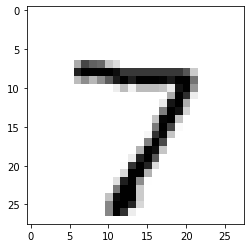

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot the image.
plt.imshow(image, cmap="gray")

# Reading a Label from the Labels File.

In [43]:
# We need to import gzip again.
import gzip

# Use gzip to open the labels folder and call it file.
with gzip.open('t10k-labels-idx1-ubyte.gz', 'rb') as file:
    # Read the contents of the file into a variable named labels.
    labels = file.read()

In [44]:
# Change the byte to an int.
int.from_bytes(labels[8:9], byteorder="big")

7

# Now create a Neural Network.

In [45]:
# We need to import Keras as Keras is used to make our Model.
import keras as kr

# We're going to build a sequential neural network.
model = kr.models.Sequential()

# Add a hidden layer which contains 1000 neurons and set the input layer with 784.
model.add(kr.layers.Dense(units=600, activation='linear', input_dim=784))
model.add(kr.layers.Dense(units=400, activation='relu'))
# Add a three neuron output layer.
model.add(kr.layers.Dense(units=10, activation='softmax'))

# Build the graph.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [46]:
import gzip

# Use gzip to open the training images file.
with gzip.open('train-images-idx3-ubyte.gz', 'rb') as f:
    train_img = f.read()

# Use gzip to open the training labels file.
with gzip.open('train-labels-idx1-ubyte.gz', 'rb') as f:
    train_lbl = f.read()

# Convert the data to arrays.
train_img = ~np.array(list(train_img[16:])).reshape(60000, 28, 28).astype(np.uint8) / 255.0
train_lbl =  np.array(list(train_lbl[ 8:])).astype(np.uint8)

In [47]:
# Place all the training images into input
inputs = train_img.reshape(60000, 784)

In [48]:
# For encoding categorical variables.
import sklearn.preprocessing as pre

encoder = pre.LabelBinarizer()
encoder.fit(train_lbl)
outputs = encoder.transform(train_lbl)

print(train_lbl[0], outputs[0])

5 [0 0 0 0 0 1 0 0 0 0]


In [49]:
for i in range(10):
     print(i, encoder.transform([i]))

0 [[1 0 0 0 0 0 0 0 0 0]]
1 [[0 1 0 0 0 0 0 0 0 0]]
2 [[0 0 1 0 0 0 0 0 0 0]]
3 [[0 0 0 1 0 0 0 0 0 0]]
4 [[0 0 0 0 1 0 0 0 0 0]]
5 [[0 0 0 0 0 1 0 0 0 0]]
6 [[0 0 0 0 0 0 1 0 0 0]]
7 [[0 0 0 0 0 0 0 1 0 0]]
8 [[0 0 0 0 0 0 0 0 1 0]]
9 [[0 0 0 0 0 0 0 0 0 1]]


In [50]:
# Train the model with the inputs and the outputs
# Pass over the dataset ten times 'epochs=10'
model.fit(inputs, outputs, epochs=10, batch_size=100)

Epoch 1/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.5252 - accuracy: 0.8427
Epoch 2/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.2365 - accuracy: 0.9270
Epoch 3/10
60000/60000 [==============================] - 6s 102us/step - loss: 0.1859 - accuracy: 0.9426
Epoch 4/10
60000/60000 [==============================] - 6s 102us/step - loss: 0.1578 - accuracy: 0.9510
Epoch 5/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.1429 - accuracy: 0.9569
Epoch 6/10
60000/60000 [==============================] - 6s 100us/step - loss: 0.1369 - accuracy: 0.9570
Epoch 7/10
60000/60000 [==============================] - 6s 100us/step - loss: 0.1207 - accuracy: 0.9625
Epoch 8/10
60000/60000 [==============================] - 6s 100us/step - loss: 0.1165 - accuracy: 0.9645
Epoch 9/10
60000/60000 [==============================] - 6s 102us/step - loss: 0.1095 - accuracy: 0.9664
Epoch 10/10
60000/60000 [=====================

In [51]:
with gzip.open('t10k-images-idx3-ubyte.gz', 'rb') as f:
    test_img = f.read()

with gzip.open('t10k-labels-idx1-ubyte.gz', 'rb') as f:
    test_lbl = f.read()
    
test_img = ~np.array(list(test_img[16:])).reshape(10000, 784).astype(np.uint8) / 255.0
test_lbl =  np.array(list(test_lbl[ 8:])).astype(np.uint8)

In [52]:
(encoder.inverse_transform(model.predict(test_img)) == test_lbl).sum()

9671

In [53]:
# Make output predictions based on the input which in this case is (test_img[4:5])
model.predict(test_img[4:5])

array([[3.7386872e-07, 4.7743782e-08, 1.7212006e-06, 6.0176375e-10,
        9.9816030e-01, 3.0585101e-09, 4.0521904e-06, 4.0328991e-06,
        2.8831242e-09, 1.8294962e-03]], dtype=float32)

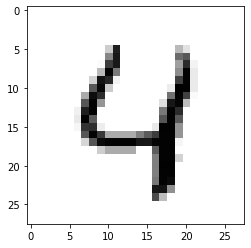

In [54]:
# Show image at index 4 in the array and reshape the plot to a 28 x 28 array
plt.imshow(test_img[4].reshape(28, 28), cmap='gray')

In [55]:
# Save the model so you don't have to train it every time.
model.save('saved_model.h5')